In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pyODEIVPSPV as ode
import OEM

In [3]:
%matplotlib inline

In [4]:
print ode.rk4.__doc__

xv,yv = rk4(fdx,fu,fy,x0,tv,p,nu,ny,[nx,np,nt,fdx_extra_args,fu_extra_args,fy_extra_args])

Wrapper for ``rk4``.

Parameters
----------
fdx : call-back function => derivative
fu : call-back function => input
fy : call-back function => output
x0 : input rank-1 array('f') with bounds (nx)
tv : input rank-1 array('f') with bounds (nt)
p : input rank-1 array('f') with bounds (np)
nu : input int
ny : input int

Other Parameters
----------------
fdx_extra_args : input tuple, optional
    Default: ()
fu_extra_args : input tuple, optional
    Default: ()
fy_extra_args : input tuple, optional
    Default: ()
nx : input int, optional
    Default: len(x0)
np : input int, optional
    Default: len(p)
nt : input int, optional
    Default: len(tv)

Returns
-------
xv : rank-2 array('f') with bounds (nt,nx)
yv : rank-2 array('f') with bounds (nt,ny)

Notes
-----
Call-back functions::

  def derivative(t,x,u,p,[nx,nu,np]): return dx
  Required arguments:
    t : input float
    x : input rank-1 array(

In [27]:
def fu1(t,x,p,nox,nou,nop,arg1,arg2):
    u = np.array([10*np.sin(t)], np.float32)
    #print "t = ",t
    #print "x = ",x
    #print "u args is ",arg1,arg2
    return u    

def fdx1(t,x,u,p,nox,nou,nop,arg1,arg2):
    m = p[0]
    c = p[1]
    k = p[2]
    
    #print "dx args is ",arg1,arg2
    
    dx = np.zeros((2,), np.float32)
    dx[0] = x[1]
    dx[1] = (u[0]-k*x[0]-c*x[1])/m
    return dx

def fy(t,x,dx,u,px,pu,py): 
    y = np.array([x[0]+x[1],x[0]-x[1]], np.float32)
    return y   

In [28]:
nop = 3
nox = 2
nou = 1
noy = 2
p = np.array([1, 0.2, 3], np.float32)
x0 = np.array([1,2], np.float32)

tv = np.arange(0.,.2,0.1)
nt = tv.shape[0]
fdx_extra_args = (99.1,'asd')
fu_extra_args = (99.2,'ewq')
fy_extra_args = (99.3,'zxc')
#xv,yv = ode.rk4(ode.fdxsample2,fu1,fy,x0,tv,p,nou,noy,nox,nop,nt,fdx_extra_args,fu_extra_args,fy_extra_args)
xv,yv = ode.rk4(fdx1,fu1,fy,x0,tv,p,nou,noy,nox,nop,nt,fdx_extra_args,fu_extra_args,fy_extra_args)

    

In [29]:
fdx_extra_args

(99.1, 'asd')

In [30]:
nop = 3
nox = 2
nou = 1
noy = 2
p = np.array([1, 0.2, 3], np.float32)
x01 = np.array([1,2], np.float32)
pest = np.array([1.4, 0.4, 2.1], np.float32)
pest = np.array([2.4, 0.4, 6.1], np.float32)
# def system.__init__(self,fdx,fy,p,nx,nu,ny,np,descr):
smd = OEM.System(fdx1, fy, p, nox, nou, noy, nop, "SpringMassDamper system.", fdx_extra_args, fu_extra_args, fy_extra_args )    

adding noise to 0 output
adding noise to 1 output


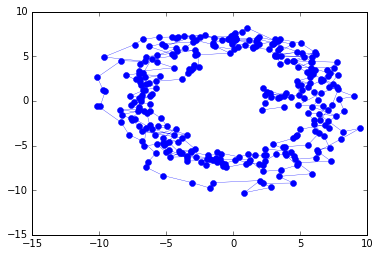

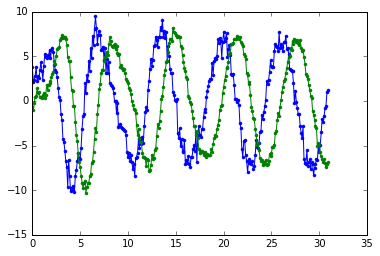

In [31]:
tv1 = np.arange(0.0, 31.0, 0.1)
exp1 = smd.generateVirtualExperiment(x01, fu1, tv1, p, (0.0, 0.0), (0.8,0.36));

plotsOn = True
if plotsOn:
    plt.figure()
    plt.plot(exp1.z[:,0],exp1.z[:,1],'.-',ms=12,lw=0.3)

    plt.figure()
    plt.plot(tv1,exp1.z[:,0],'.-',tv1,exp1.z[:,1],'.-')   

In [32]:
smd.fy_extarg, type(smd.fy_extarg)


((99.3, 'zxc'), tuple)

In [33]:
R = exp1.covarianceEstimate(pest)
print "R = ", R

R =  [[ 2329.21850586  -247.28448486]
 [ -247.28448486  2126.16479492]]


In [34]:
abstol,reltol = 1e-6,1e-5
F,G,simnom,Y = exp1.computeFG(pest,R,abstol,reltol)
print "F"
print F
print "G"
print G

F
[[ 1.11526799 -0.02102385 -0.47574228]
 [-0.02102385  0.39530605  0.00933582]
 [-0.47574228  0.00933582  0.26006112]]
G
[ 0.15458789  0.02136246 -0.37992856]


In [35]:
OE = OEM.OutputError(smd, pest)
OE.addExperiment( exp1 )

In [36]:
niter = 15
costs,parameters,znominals,sigmas = OE.OEiters(niter)

iteration  0
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14


In [37]:
parameters = np.array(parameters)
sigmas = np.array(sigmas)

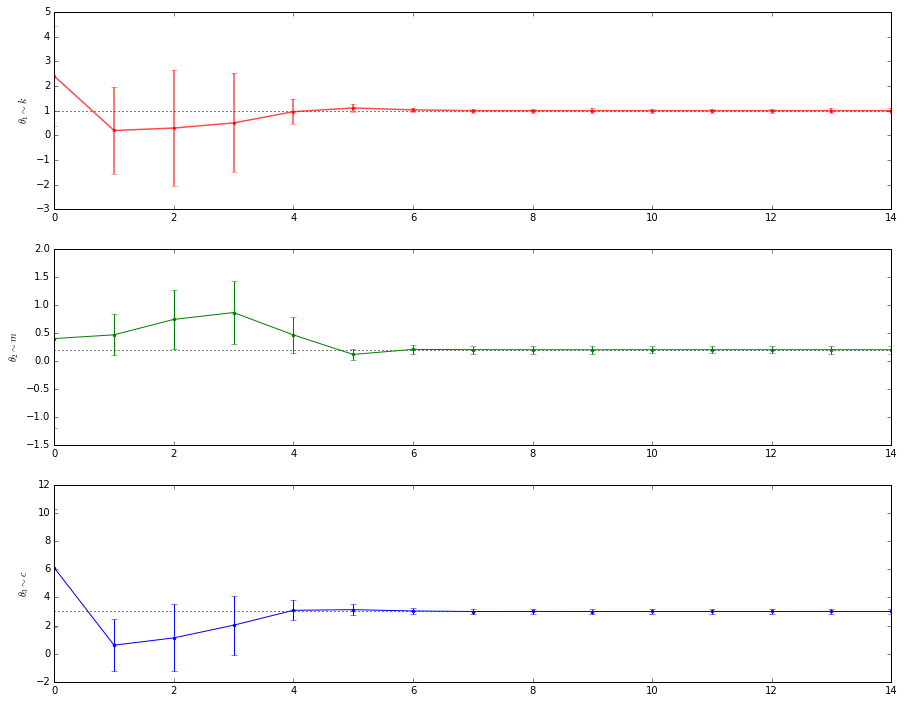

In [39]:
plt.figure(figsize=(15,12))
iters = np.array(range(niter))

plt.subplot(311);
#pl.plot(range(niter),parameters[:,0],'ro',mec='r')
plt.plot(iters, p[0]*iters**0,':k')
plt.errorbar(iters,parameters[:,0],sigmas[:,0],fmt='.-r',ecolor='r',alpha=0.7,lw=1.5)
plt.ylabel('$\\theta_1 \\sim k$')

plt.subplot(312);
#pl.plot(range(niter),parameters[:,1],'go',mec='g')
plt.plot(iters, p[1]*iters**0,':k')
plt.errorbar(iters,parameters[:,1],sigmas[:,1],fmt='.-g',ecolor='g')
plt.ylabel('$\\theta_2 \\sim m$')

plt.subplot(313);
#pl.plot(range(niter),parameters[:,2],'bo',mec='b')
plt.plot(iters, p[2]*iters**0,':k')
plt.errorbar(iters,parameters[:,2],sigmas[:,2],fmt='.-b',ecolor='b')  
plt.ylabel('$\\theta_3 \\sim c$')

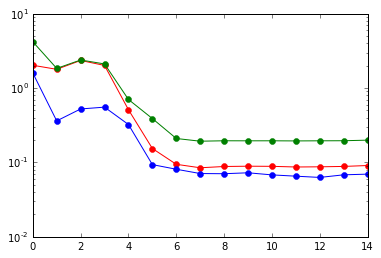

In [40]:
plt.figure()
plt.semilogy(range(niter),sigmas[:,0],'ro-',mec='r')
plt.semilogy(range(niter),sigmas[:,1],'bo-',mec='b')
plt.semilogy(range(niter),sigmas[:,2],'go-',mec='g')    

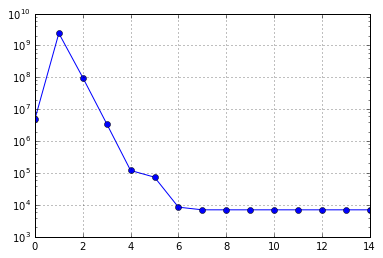

In [41]:
plt.figure()
plt.semilogy(range(niter),costs,'o-')
plt.grid() 

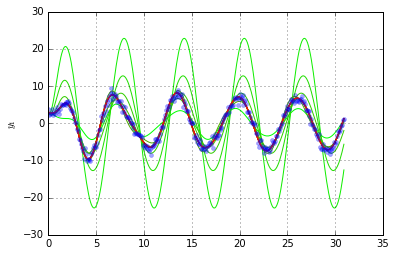

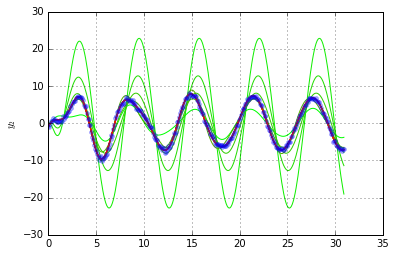

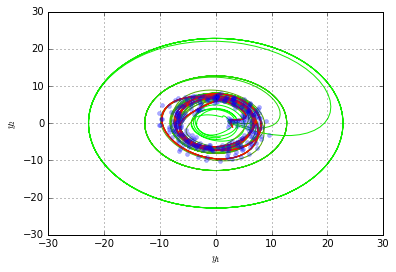

In [42]:
def colormap(i,niter): 
    l = float(i)/niter
    return  (l,1-l,0.0)


plt.figure()
for i in range(niter):
    plt.plot(znominals[i].t,znominals[i].z[:,0],color=colormap(i,niter));
plt.plot(exp1.t,exp1.z[:,0],'.',mfc='b',mec='b',alpha=0.36,ms=8)        
plt.grid()
plt.ylabel('$y_1$')

plt.figure()
for i in range(niter):
    plt.plot(znominals[i].t,znominals[i].z[:,1],color=colormap(i,niter));
plt.plot(exp1.t,exp1.z[:,1],'.',mfc='b',mec='b',alpha=0.36,ms=8)        
plt.grid()
plt.ylabel('$y_2$')

plt.figure()
for i in range(niter):
    plt.plot(znominals[i].z[:,0],znominals[i].z[:,1],color=colormap(i,niter));
plt.plot(exp1.z[:,0],exp1.z[:,1],'.',mfc='b',mec='b',alpha=0.32,ms=8)            
plt.grid()
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')

In [43]:
def perturbedDerivatives(t,x,u,p,fdx,nox,nop,abstol,reltol):    
    dx = np.zeros((nop*nox,), np.float32)
    for i in range(nop):
        ppert = p.copy()
        ppert[i] += abstol
        dx[i*nox:(i+1)*nox] = fdx(t,x,u,ppert)
    return dx        

In [44]:
dx = perturbedDerivatives(0.0, np.array([0.3,0.4], np.float32), np.array([0.1], np.float32), np.array([0.1,0.2,0.3], np.float32), ode.fdxsample2, 2, 3, 1e-3,1e-3)

In [45]:
print dx

[ 0.40000001 -0.69306934  0.40000001 -0.70400006  0.40000001 -0.70300007]


In [48]:
from IPython.html.widgets import interact, fixed

In [55]:
def animStep(i):
    plt.figure()
    #for i in range(niter):
    plt.plot(znominals[i].t,znominals[i].z[:,0],color=colormap(i,niter));
    plt.plot(exp1.t,exp1.z[:,0],'.',mfc='b',mec='b',alpha=0.36,ms=8)        
    plt.axis([0,40,-30,30])
    plt.grid()
    plt.ylabel('$y_1$')

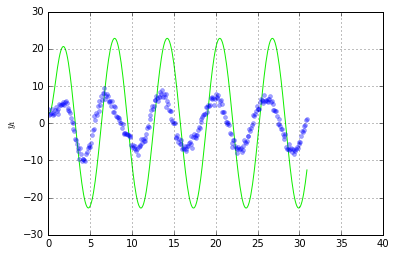

In [56]:
animStep(1)

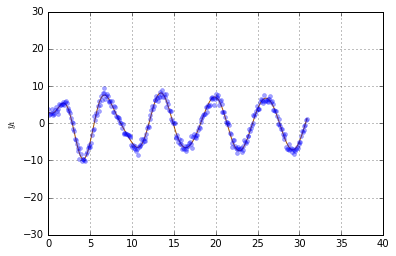

In [57]:
interact(animStep, i=(0,10))